# Visualizing distributions of data
- Plotting univariate histograms
    - Choosing the bin size
    - Conditioning on other variables
    - Normalized histogram statistics
- Kernel density estimation
    - Choosing the smoothing bandwidth
    - Conditioning on other variables
    - Kernel density estimation pitfalls
- Empirical cumulative distributions
- Visualizing bivariate distributions
- Distribution visualization in other settings
    - Plotting joint and marginal distributions
    - Plotting many distributions


- histplot -> kind='hist' / default
- kdeplot -> kind='kde'
- ecdfplot -> kind='ecdf'

. rugplot

___

## Plotting univriate histograms

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


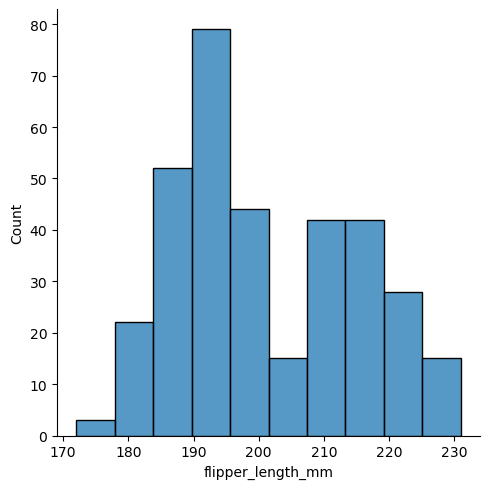

In [3]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='hist',
);

### Choosing the bin size

- binwidth
- bins

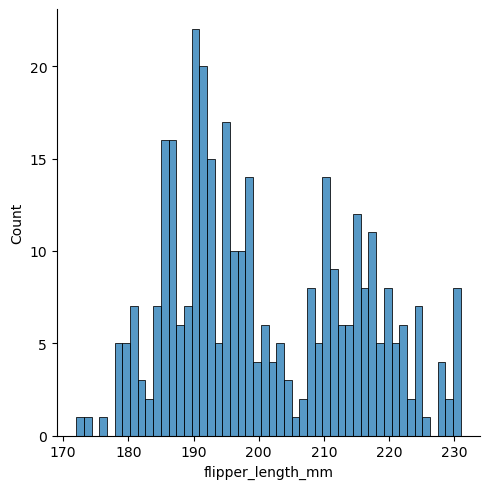

In [4]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='hist',
    bins=50,
);

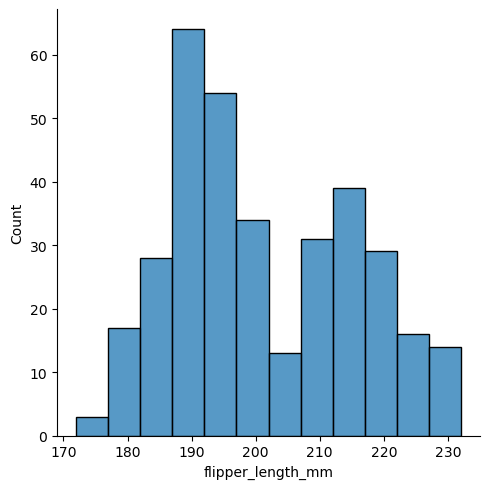

In [5]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='hist',
    binwidth=5,
);

One example of a situation where defaults fail is when the variable takes a **relatively small number of integer** values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


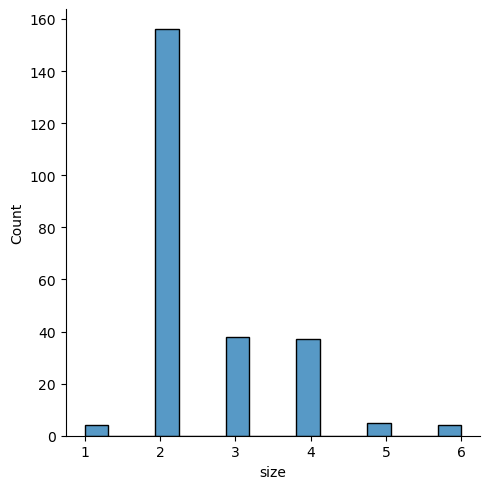

In [7]:
sns.displot(tips, x='size');

One approach would be to specify the precise bin breaks by passing an array to bins:



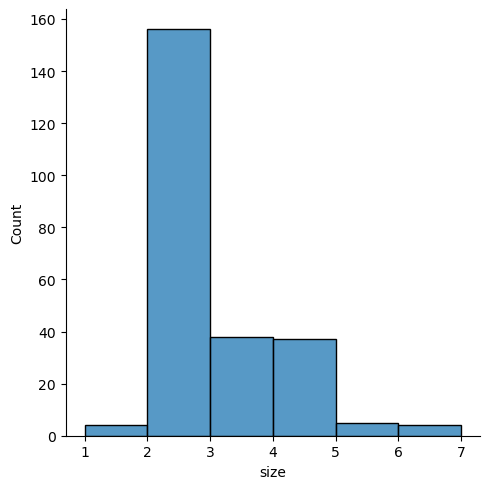

In [8]:
sns.displot(
    data=tips,
    x='size',
    bins=[1, 2, 3, 4, 5, 6, 7],
);

This can also be accomplished by setting discrete=True, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

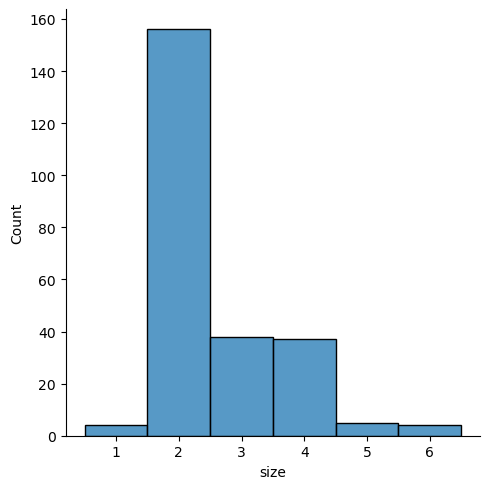

In [9]:
sns.displot(
    data=tips,
    x='size',
    discrete=True,
);

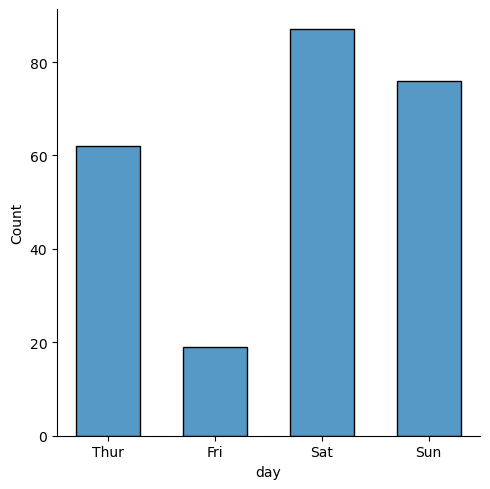

In [10]:
sns.displot(
    data=tips,
    x='day',
    shrink=0.6,
)

### Conditioning on other variables

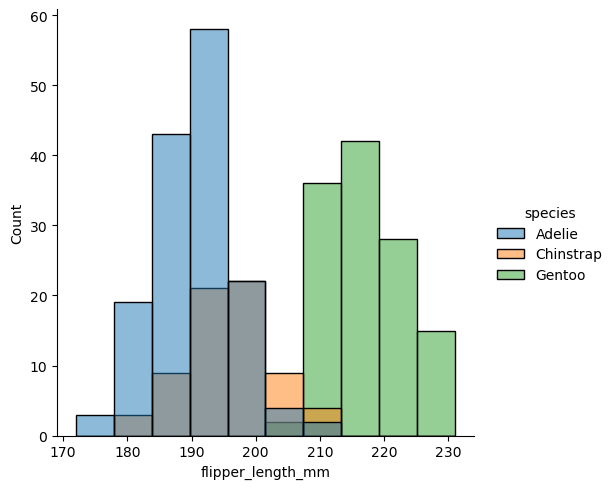

In [11]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
);

___

By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a “step” plot:

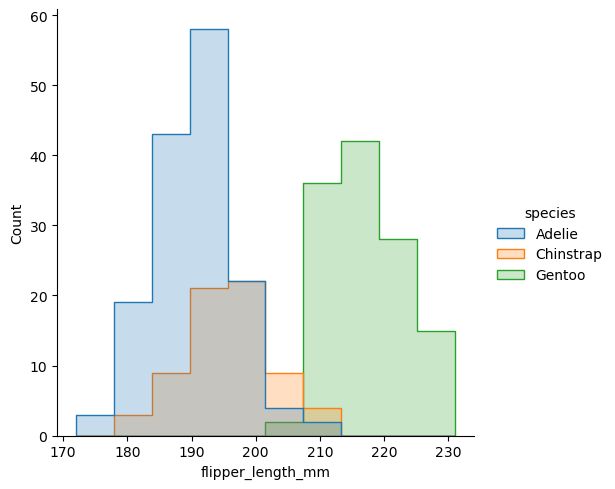

In [12]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    element='step', # bars, step, poly
);

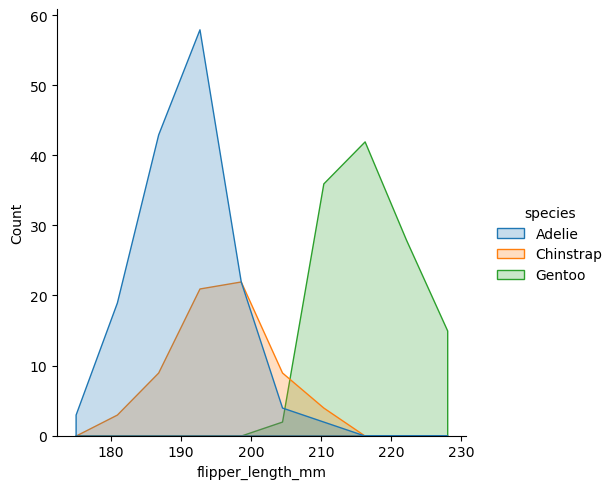

In [13]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    element='poly',
);

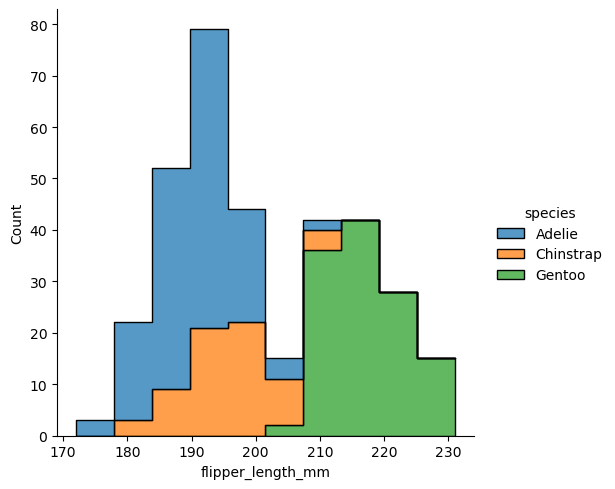

In [14]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    element='step', 
    multiple = 'stack', # layer, dodge, stack, fill 
);

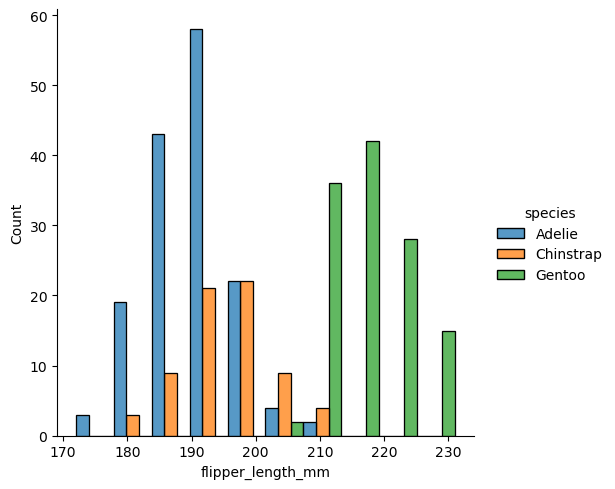

In [15]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple = 'dodge', # layer, dodge, stack, fill 
);

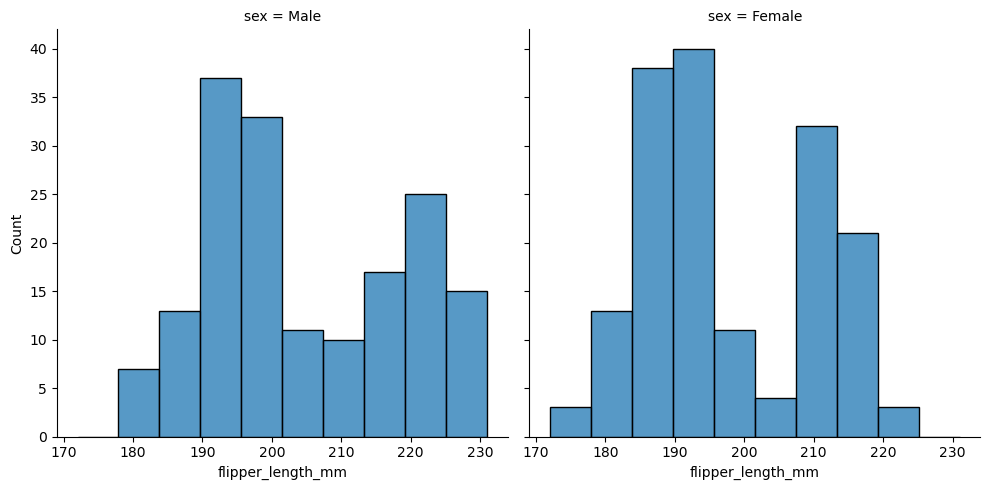

In [16]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    col='sex',
);

None of these approaches are perfect, and we will soon see some alternatives to a histogram that are better-suited to the task of comparison.



___

### Normalized histogram statistics

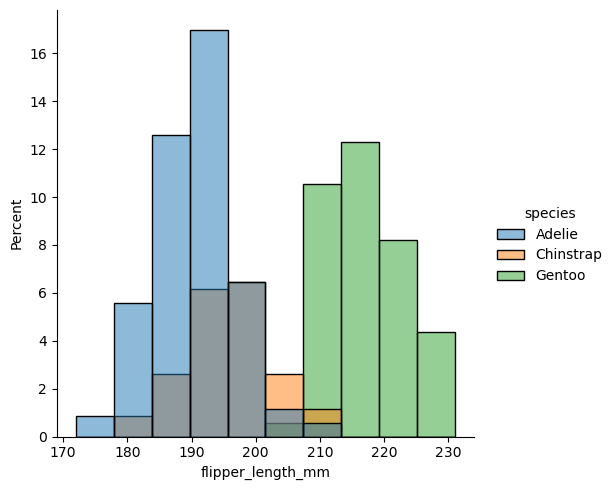

In [17]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    stat='percent',
);

`stat`: Aggregate statistic to compute in each bin. Options are:

- **count**: show the number of observations in each bin
- **frequency**: show the number of observations divided by the bin width
- **probability** or proportion: normalize such that bar heights sum to 1
- **percent**: normalize such that bar heights sum to 100
- **density**: normalize such that the total area of the histogram equals 1

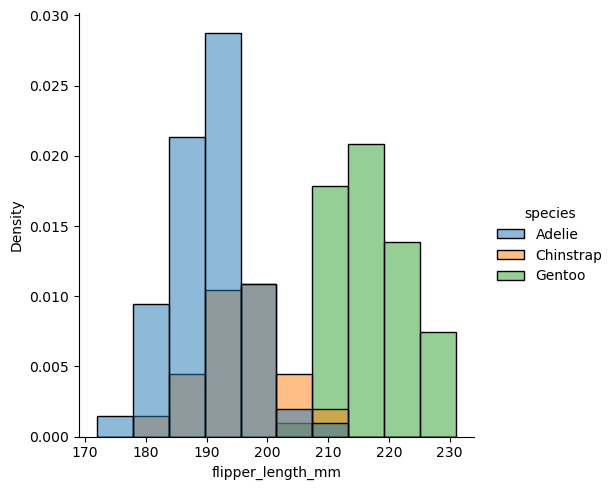

In [18]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    stat='density',
);

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting common_norm=False, each subset will be normalized independently:

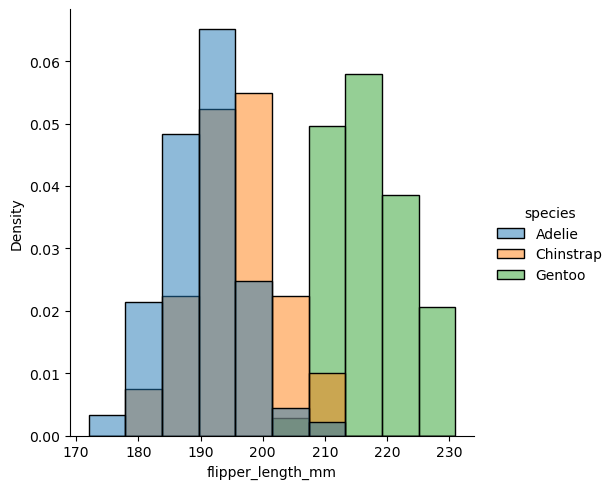

In [19]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    stat='density',
    common_norm=False
);

___

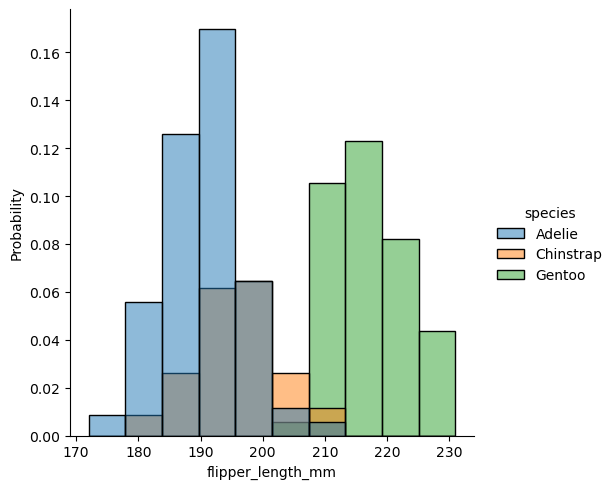

In [20]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    stat='probability',

);

#### having only kde part of the histplot without scaling

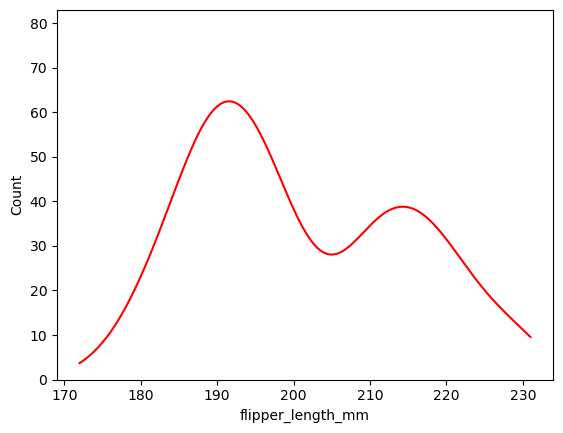

In [57]:
ax = sns.histplot(
    data=penguins,
    color="white", # important part
    x='flipper_length_mm',
    element="step", # important part
    kde=True,
);
ax.lines[0].set_color("red")

<br> <br>

## Kernel density estimation

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

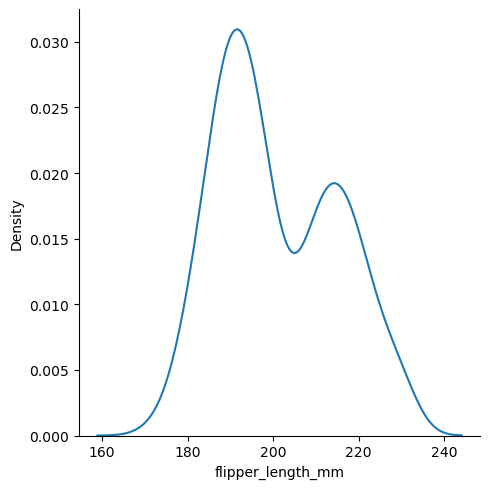

In [22]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
);

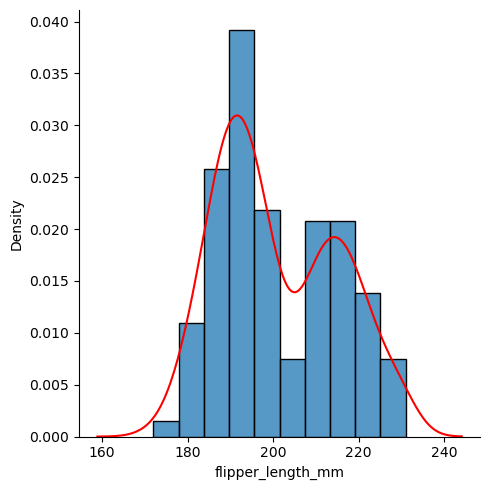

In [23]:
g = sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
    color='red',
);

g.map(sns.histplot, data=penguins, x='flipper_length_mm', stat='density')

### Choosing the smoothing bandwidth

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

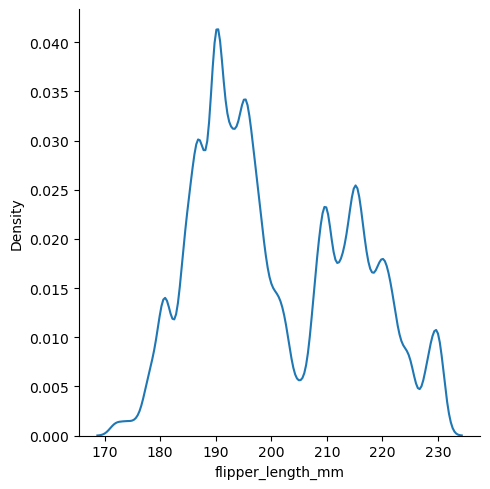

In [24]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
    bw_adjust=0.25,
)

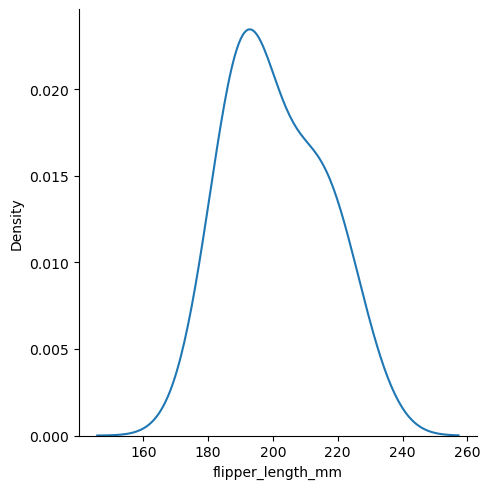

In [25]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
    bw_adjust=2,
)

### Conditioning on other variables

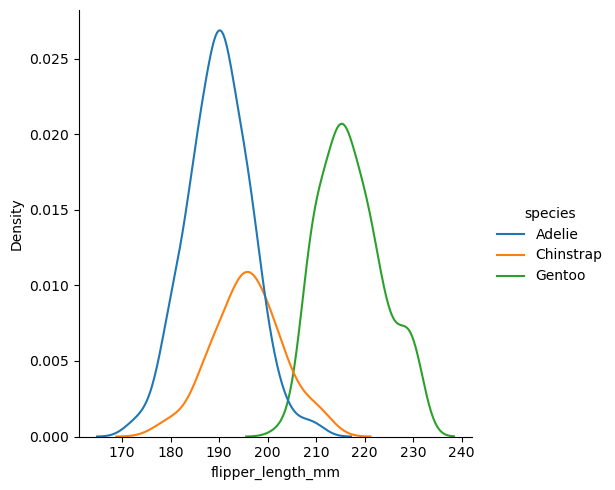

In [26]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
    hue='species',
)

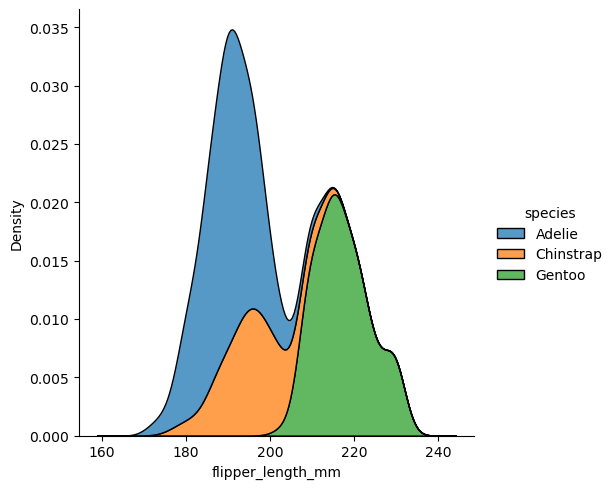

In [27]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
    hue='species',
    multiple='stack',
)

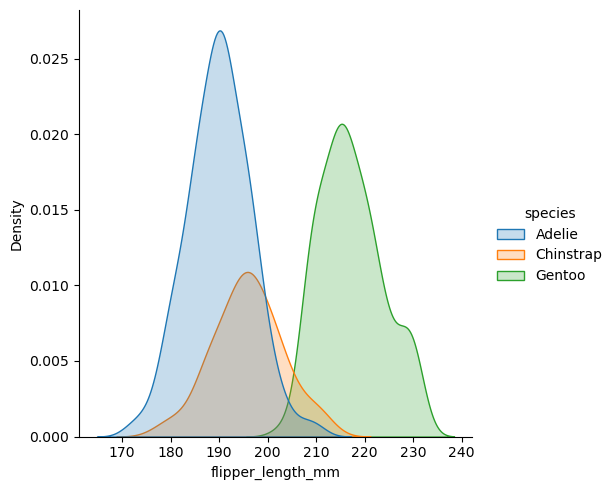

In [28]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    kind='kde',
    hue='species',
    fill=True,
);

### Kernel density estimation pifalls

KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because **the logic of KDE assumes that the underlying distribution is smooth and unbounded**. One way this assumption can fail is when a variable reflects a quantity that is naturally **bounded**. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

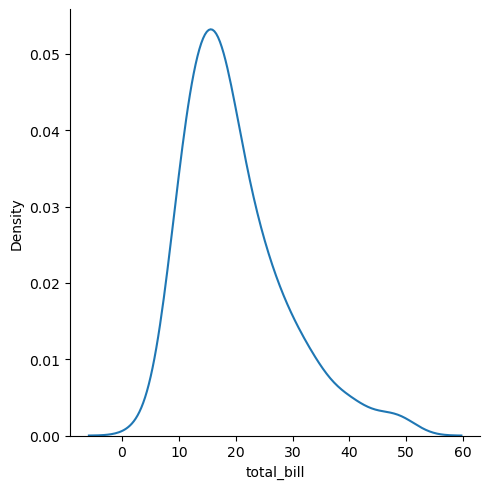

In [29]:
sns.displot(
    data=tips,
    x='total_bill',
    kind='kde',
);

the bill can not be negative, but the plot shows there is a part of data which is negative, and it's wrong

you can fix it by `cut` :

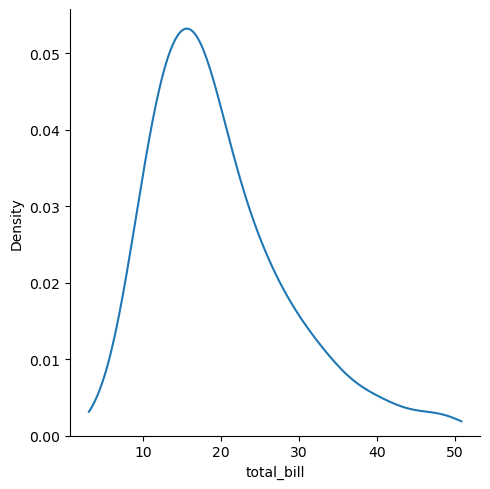

In [30]:
sns.displot(
    data=tips,
    x='total_bill',
    kind='kde',
    cut=0,
);

**The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented**. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

In [31]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
diamonds['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64

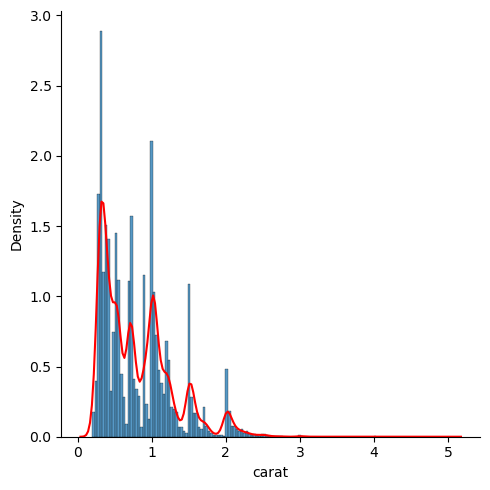

In [33]:
g = sns.displot(
    data=diamonds,
    x='carat',
    kind='hist',
    stat='density',
)
g.map(sns.kdeplot, data=diamonds, x='carat', color='red',)

While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution




you can also do this :

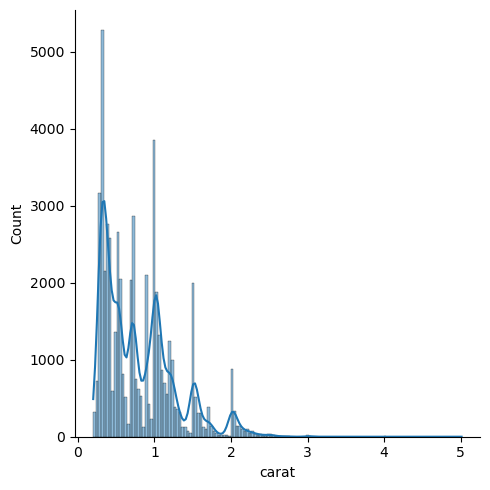

In [34]:
sns.displot(
    data=diamonds,
    x='carat',
    kind='hist',
    kde=True,
)

___

## Empirical cumulative distributions

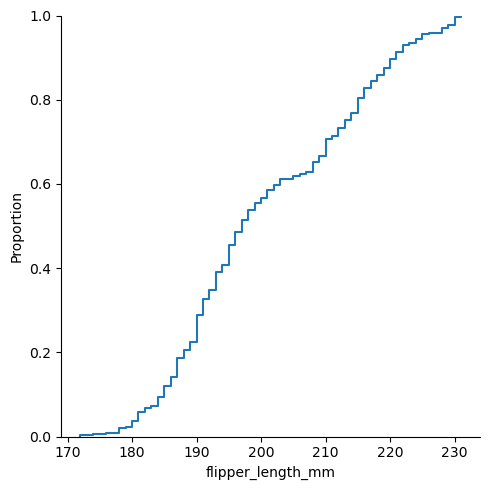

In [35]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    kind='ecdf',
);


The ECDF plot has two key advantages. **Unlike the histogram or KDE, it directly represents each datapoint**. That means there is no bin size or smoothing parameter to consider. Additionally, **because the curve is monotonically increasing, it is well-suited for comparing multiple distributions**:

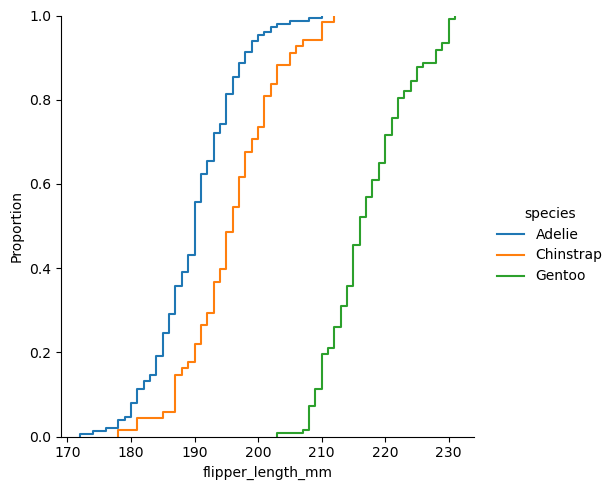

In [36]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    kind="ecdf"
)

## Visualizing bivariate distributions

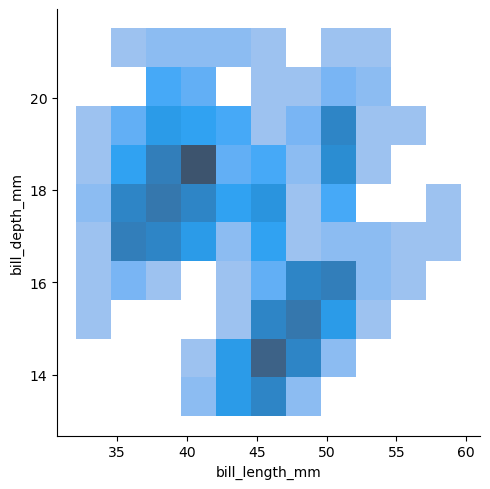

In [37]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
);

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analogous to a heatmap()). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the contours of the 2D density:

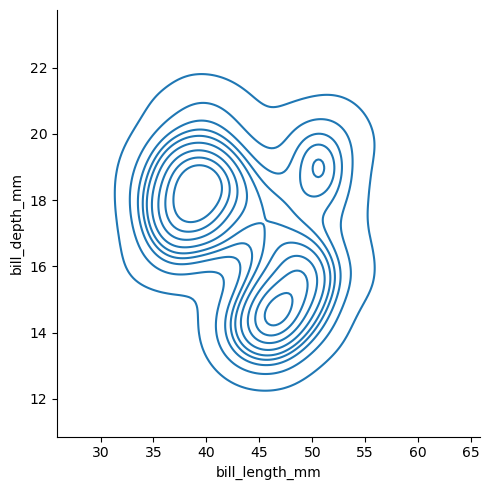

In [38]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
);

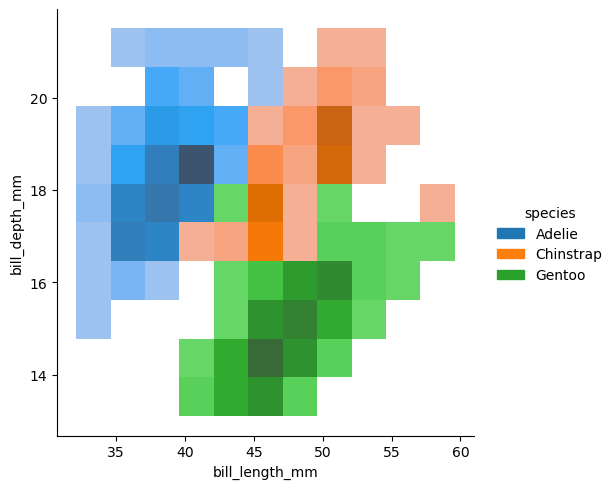

In [39]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
);

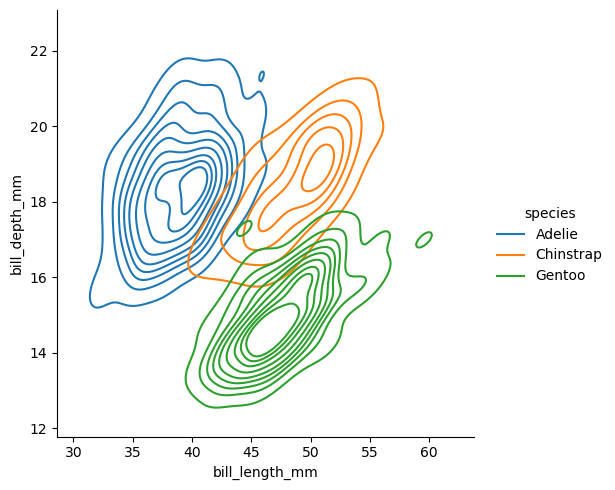

In [40]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    kind='kde',
);

Just as with univariate plots, the choice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution. The same parameters apply, but they can be tuned for each variable by passing a pair of values:

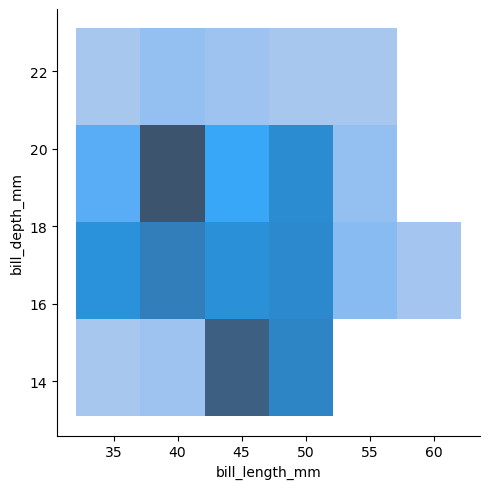

In [41]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    binwidth=(5, 2.5), # (width, height)
);

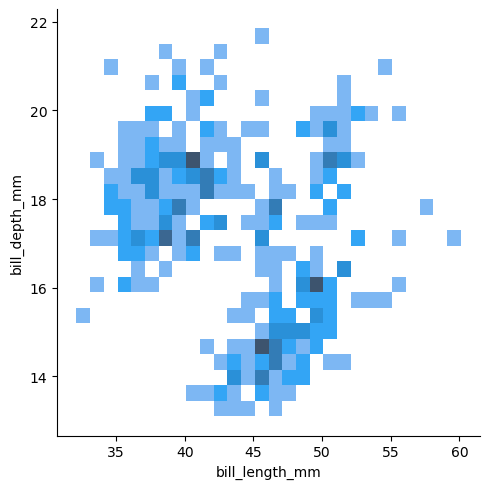

In [42]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    binwidth=(1, 0.35), # (width, height),
);

To aid interpretation of the heatmap, add a colorbar to show the mapping between counts and color intensity:



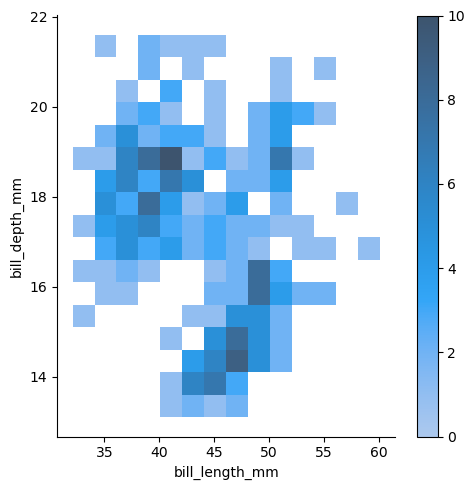

In [43]:
sns.displot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    binwidth=(2, 0.5),
    cbar=True,
)

The meaning of the bivariate density contours is less straightforward. Because the density is not directly interpretable, the contours are drawn at iso-proportions of the density, meaning that each curve shows a level set such that some proportion p of the density lies below it. The p values are evenly spaced, with the lowest level contolled by the `thresh` parameter and the number controlled by `levels`:

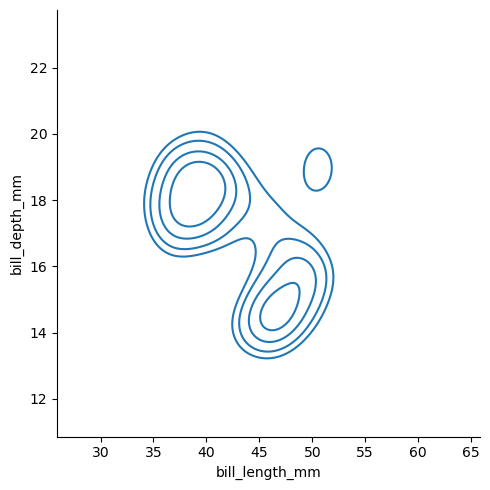

In [44]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    thresh=0.4,
    levels=5
)

The levels parameter also accepts a list of values, for more control:



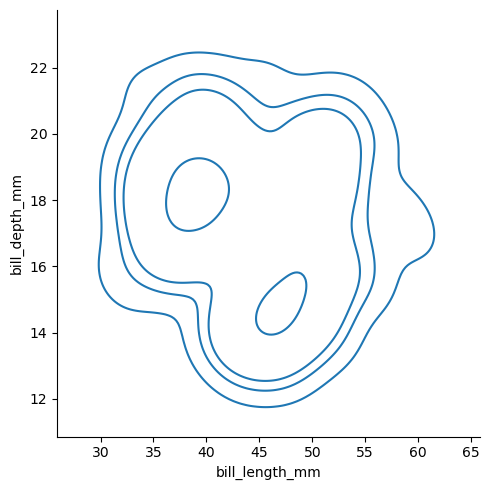

In [45]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    kind="kde",
    levels=[.01, .05, .1, .8]
)

The bivariate histogram allows one or both variables to be discrete. Plotting **one discrete** and **one continuous** variable offers another way to compare conditional univariate distributions:

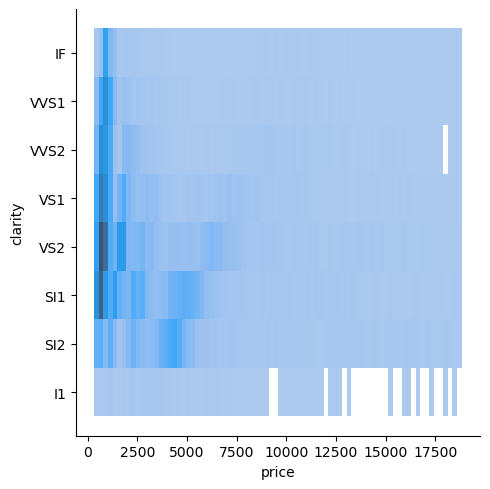

In [46]:
sns.displot(
    data=diamonds,
    x="price",
    y="clarity",
)

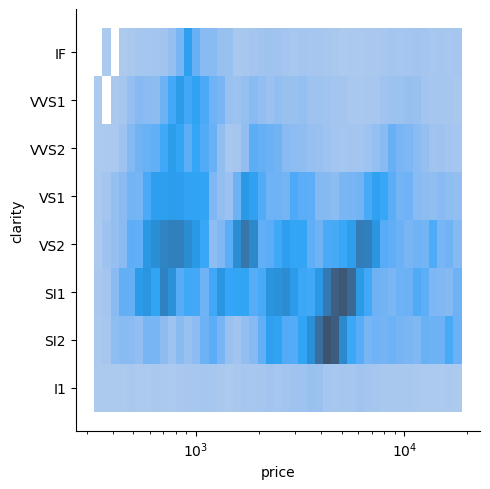

In [47]:
sns.displot(
    diamonds,
    x="price",
    y="clarity",
    log_scale=(True, False)
)

## Distribution visualization in other settings 

Several other figure-level plotting functions in seaborn make use of the histplot() and kdeplot() functions.


### Plotting joint and marginal distributions


The first is **jointplot()**, which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot():

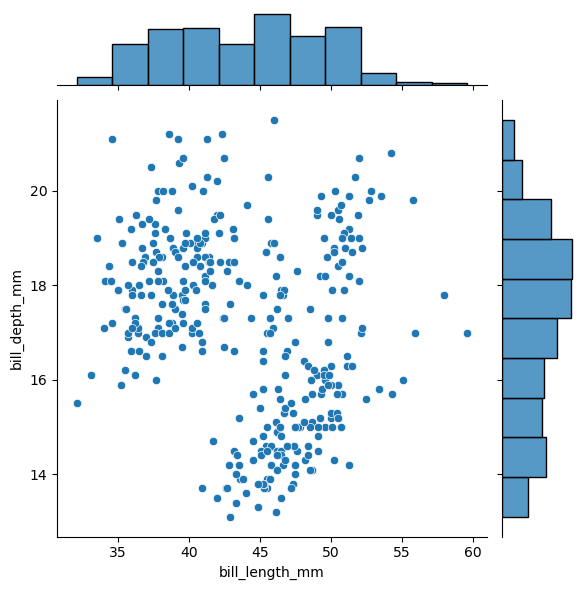

In [48]:
sns.jointplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
);

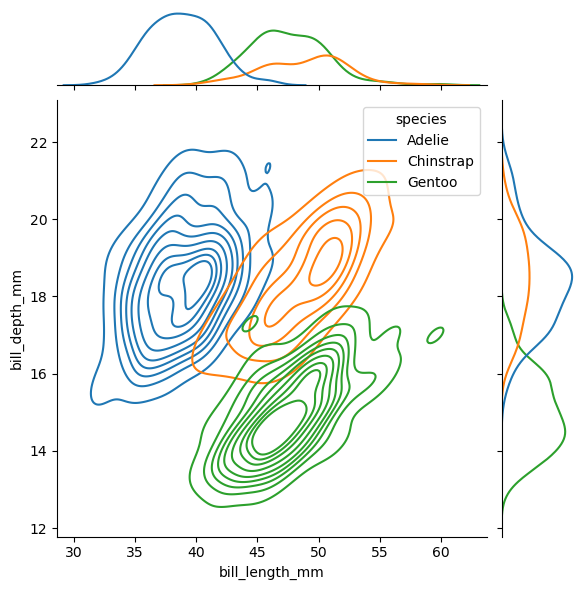

In [49]:
sns.jointplot(
    data=penguins,
    x='bill_length_mm', y='bill_depth_mm',
    kind='kde',
    hue='species',
)

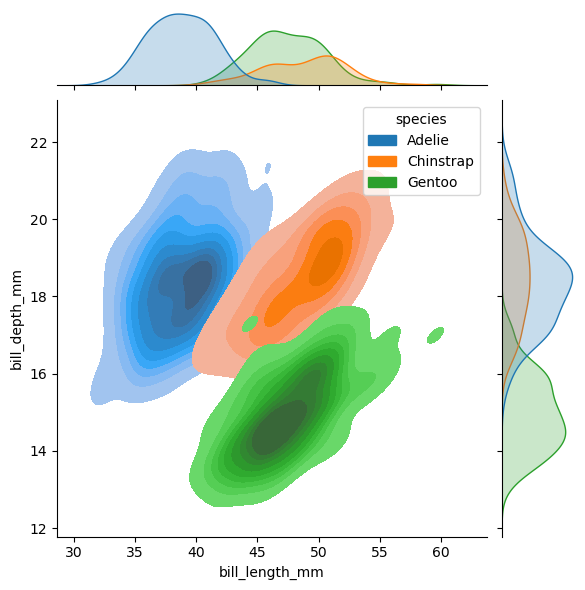

In [50]:
sns.jointplot(
    data=penguins,
    x='bill_length_mm', y='bill_depth_mm',
    kind='kde',
    hue='species', fill=True,
)

`jointplot()` is a convenient interface to the `JointGrid` class, which offeres more flexibility when used directly:



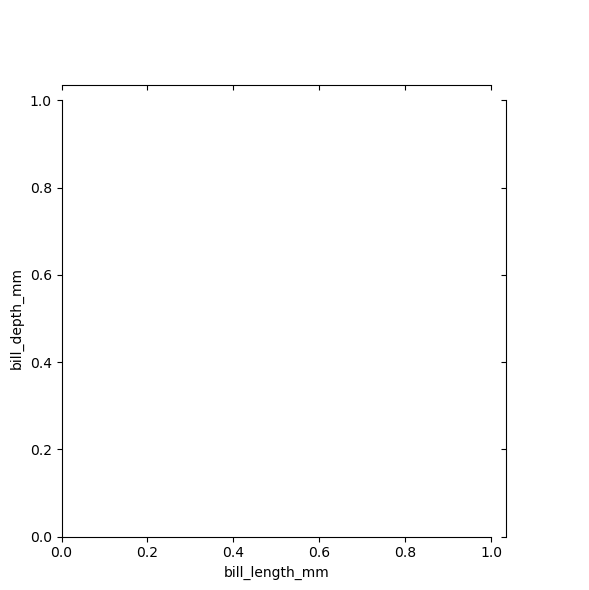

In [51]:
g = sns.JointGrid(
    data=penguins,
    x='bill_length_mm', y='bill_depth_mm',
)

this is just a gride, now lets draw in it :

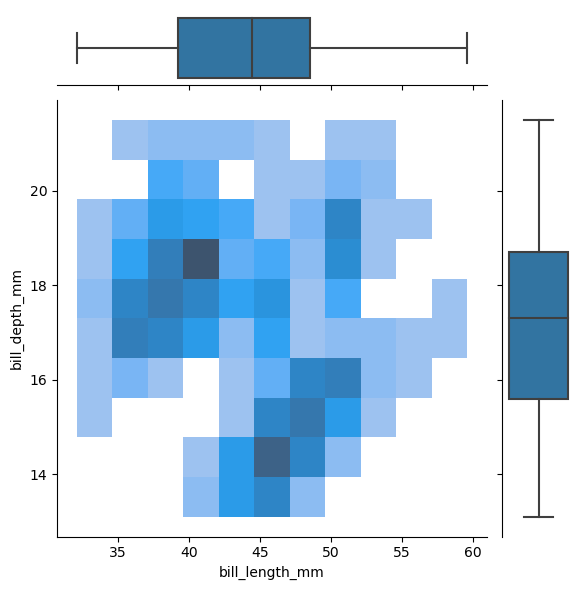

In [52]:
g = sns.JointGrid(
    data=penguins,
    x='bill_length_mm', y='bill_depth_mm',
)

g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

A less-obtrusive way to show marginal distributions uses a “rug” plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into displot():

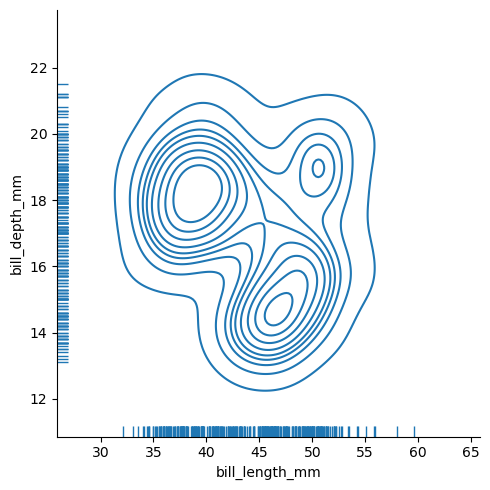

In [53]:
sns.displot(
    penguins,
    x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

And the axes-level rugplot() function can be used to **add rugs on the side of any other kind of plot:**



<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

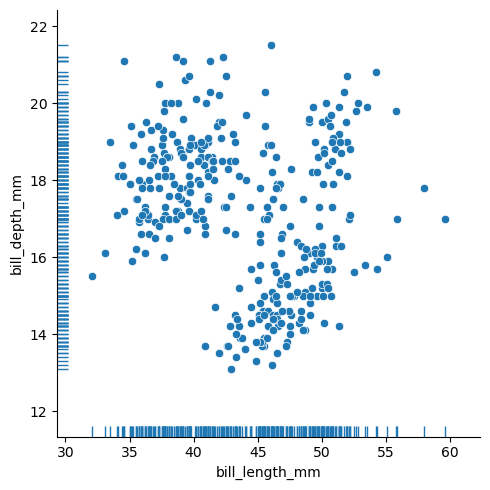

In [54]:
g = sns.relplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
)

sns.rugplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
)
    

### Plotting many distributions

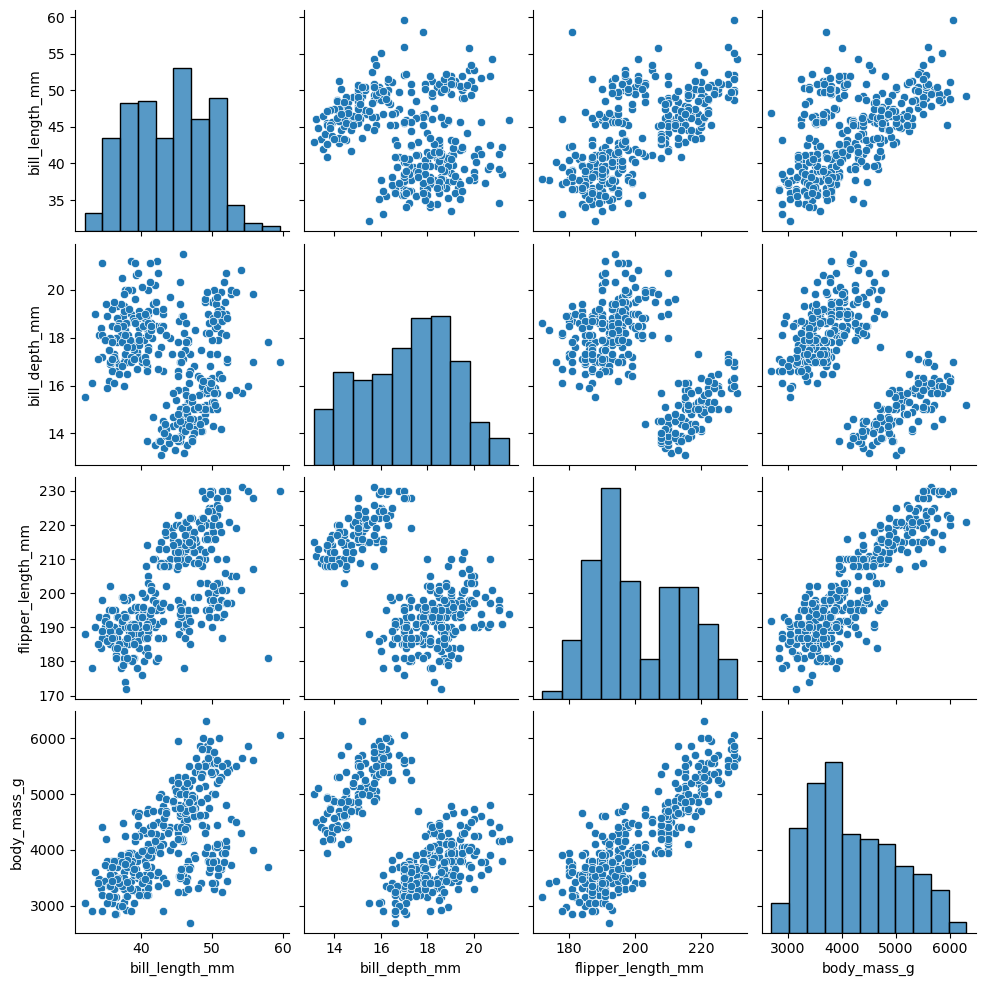

In [55]:
sns.pairplot(
    data=penguins
)

As with jointplot()/JointGrid, using the underlying `PairGrid` directly will afford more flexibility with only a bit more typing:



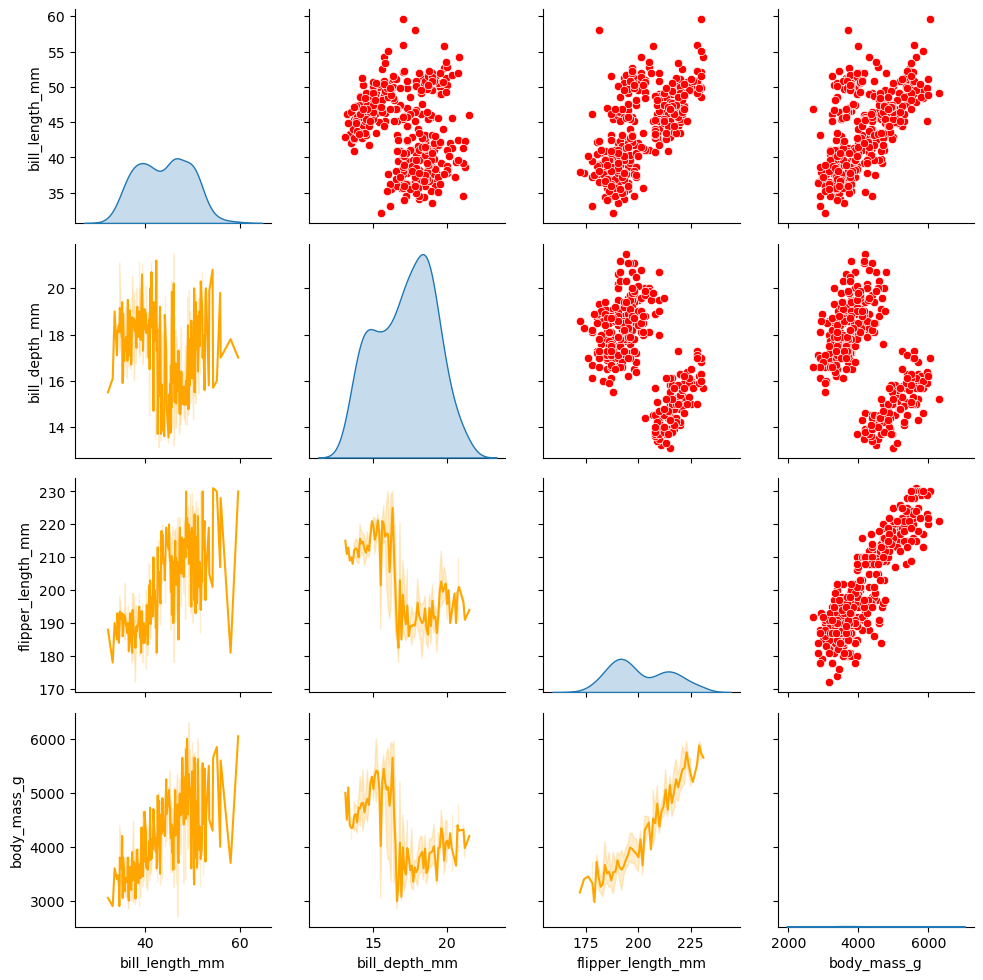

In [56]:
g = sns.PairGrid(data=penguins)

g.map_upper(sns.scatterplot, color='red',)
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.lineplot, color='orange',)